<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,21.876562,0.000078,220.649500,220.649549,-0.000049
1,0.0,1.0,57.329540,88.266135,33.974483,50.262247,-0.000333,239.832073,239.832417,-0.000344
2,0.0,2.0,45.215694,22.043105,89.071799,69.804692,-0.002024,236.133265,236.135229,-0.001963
3,0.0,3.0,69.375325,71.150993,24.742899,82.214303,-0.000121,257.483400,257.483380,0.000019
4,0.0,4.0,87.837297,47.725671,65.999025,57.222775,0.000293,268.785060,268.784753,0.000307
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.436782,42.382575,71.198338,44.570714,-0.000470,202.587938,202.588388,-0.000450
249996,999.0,246.0,87.681287,91.864031,54.033479,22.842744,0.000170,266.421712,266.421620,0.000092
249997,999.0,247.0,87.743793,97.197816,78.219199,55.915357,-0.000042,329.076123,329.076227,-0.000104
249998,999.0,248.0,36.274014,63.552257,86.313455,98.232329,-0.000269,294.371786,294.372005,-0.000218


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.854520  58.707153  61.211187  21.876562  0.000078  220.649500   
      1.0    57.329540  88.266135  33.974483  50.262247 -0.000333  239.832073   
      2.0    45.215694  22.043105  89.071799  69.804692 -0.002024  236.133265   
      3.0    69.375325  71.150993  24.742899  82.214303 -0.000121  257.483400   
      4.0    87.837297  47.725671  65.999025  57.222775  0.000293  268.785060   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714 -0.000470  202.587938   
      246.0  87.681287  91.864031  54.033479  22.842744  0.000170  266.421712   
      247.0  87.743793  97.197816  78.219199  55.915357 -0.000042  329.076123   
      248.0  36.274014  63.552257  86.313455  98.232329 -0.000269  294.371786   
      249.0  82.052680  63.134744  90.658667  77.433614  0.000341  323.280046   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.649549 -0.000049  
      1.0    239.832417 -0.000344  
      2.0    236.135229 -0.001963  
      3.0    257.483380  0.000019  
      4.0    268.784753  0.000307  
...                 ...       ...  
999.0 245.0  202.588388 -0.000450  
      246.0  266.421620  0.000092  
      247.0  329.076227 -0.000104  
      248.0  294.372005 -0.000218  
      249.0  323.279729  0.000317  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.854520  58.707153  61.211187  21.876562  0.000078  220.649500   
      1.0    57.329540  88.266135  33.974483  50.262247 -0.000333  239.832073   
      2.0    45.215694  22.043105  89.071799  69.804692 -0.002024  236.133265   
      3.0    69.375325  71.150993  24.742899  82.214303 -0.000121  257.483400   
      4.0    87.837297  47.725671  65.999025  57.222775  0.000293  268.785060   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714 -0.000470  202.587938   
      246.0  87.681287  91.864031  54.033479  22.842744  0.000170  266.421712   
      247.0  87.743793  97.197816  78.219199  55.915357 -0.000042  329.076123   
      248.0  36.274014  63.552257  86.313455  98.232329 -0.000269  294.371786   
      249.0  82.052680  63.134744  90.658667  77.433614  0.000341  323.280046   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.649549 -0.000049  
      1.0    239.832417 -0.000344  
      2.0    236.135229 -0.001963  
      3.0    257.483380  0.000019  
      4.0    268.784753  0.000307  
...                 ...       ...  
999.0 245.0  202.588388 -0.000450  
      246.0  266.421620  0.000092  
      247.0  329.076227 -0.000104  
      248.0  294.372005 -0.000218  
      249.0  323.279729  0.000317  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,21.876562,0.000078,220.649500,220.649549,-0.000049
1,0.0,1.0,57.329540,88.266135,33.974483,50.262247,-0.000333,239.832073,239.832417,-0.000344
2,0.0,2.0,45.215694,22.043105,89.071799,69.804692,-0.002024,236.133265,236.135229,-0.001963
3,0.0,3.0,69.375325,71.150993,24.742899,82.214303,-0.000121,257.483400,257.483380,0.000019
4,0.0,4.0,87.837297,47.725671,65.999025,57.222775,0.000293,268.785060,268.784753,0.000307
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,34.436782,42.382575,71.198338,44.570714,-0.000470,202.587938,202.588388,-0.000450
249996,999.0,246.0,87.681287,91.864031,54.033479,22.842744,0.000170,266.421712,266.421620,0.000092
249997,999.0,247.0,87.743793,97.197816,78.219199,55.915357,-0.000042,329.076123,329.076227,-0.000104
249998,999.0,248.0,36.274014,63.552257,86.313455,98.232329,-0.000269,294.371786,294.372005,-0.000218


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    68.854520  58.707153  61.211187  21.876562  0.000078  220.649500   
      1.0    57.329540  88.266135  33.974483  50.262247 -0.000333  239.832073   
      2.0    45.215694  22.043105  89.071799  69.804692 -0.002024  236.133265   
      3.0    69.375325  71.150993  24.742899  82.214303 -0.000121  257.483400   
      4.0    87.837297  47.725671  65.999025  57.222775  0.000293  268.785060   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  34.436782  42.382575  71.198338  44.570714 -0.000470  202.587938   
      246.0  87.681287  91.864031  54.033479  22.842744  0.000170  266.421712   
      247.0  87.743793  97.197816  78.219199  55.915357 -0.000042  329.076123   
      248.0  36.274014  63.552257  86.313455  98.232329 -0.000269  294.371786   
      249.0  82.052680  63.134744  90.658667  77.433614  0.000341  323.280046   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.649549 -0.000049  
      1.0    239.832417 -0.000344  
      2.0    236.135229 -0.001963  
      3.0    257.483380  0.000019  
      4.0    268.784753  0.000307  
...                 ...       ...  
999.0 245.0  202.588388 -0.000450  
      246.0  266.421620  0.000092  
      247.0  329.076227 -0.000104  
      248.0  294.372005 -0.000218  
      249.0  323.279729  0.000317  

[250000 rows x 8 columns]

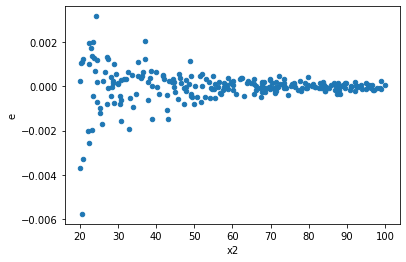

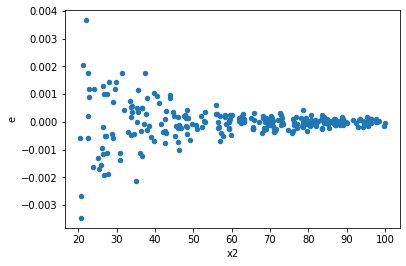

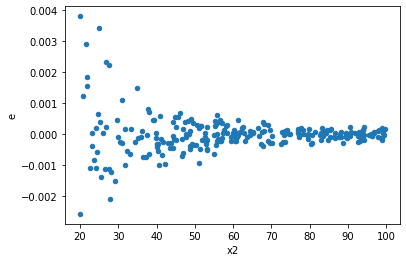

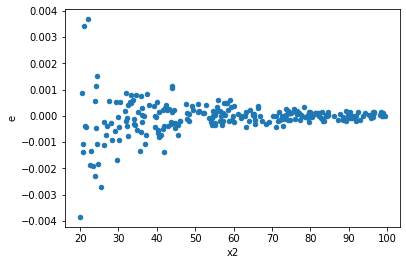

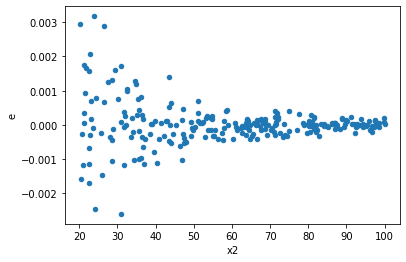

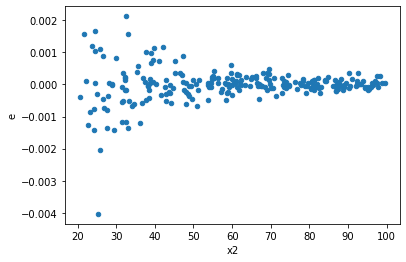

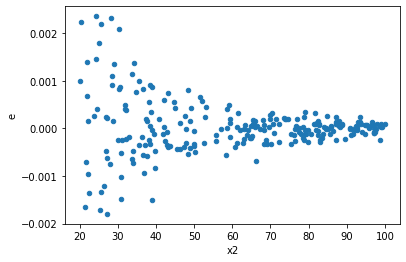

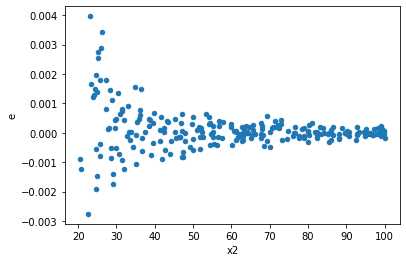

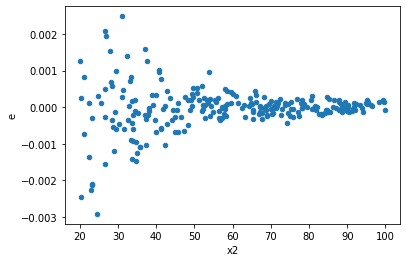

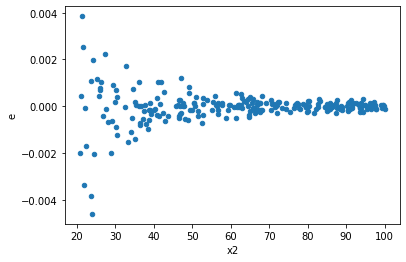

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,122.0,120.0,1.3992516088299165e-05,5.710964777121171e-05,1.146927548221243e-07,4.759137314267642e-07,4.1494663910100815,6.372680161348399e-14,0.9999999999999681,3.186340080674199e-14,Reject005=0 : Heteroscedasticity
8.0,96.0,146.0,8.205200178495513e-06,7.967176043505759e-05,8.54708351926616e-08,5.456969892812164e-07,6.384598770459531,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
9.0,103.0,139.0,3.251922112250252e-05,9.398315058240084e-05,3.1572059342235456e-07,6.761377739741067e-07,2.1415700719579127,3.030961634720164e-05,0.9999848451918264,1.515480817360082e-05,Reject005=0 : Heteroscedasticity
12.0,114.0,128.0,2.7341467291474065e-05,0.0001343585246077951,2.3983743238135145e-07,1.0496759734983991e-06,4.376614455367296,3.552713678800501e-15,0.9999999999999982,1.7763568394002505e-15,Reject005=0 : Heteroscedasticity
16.0,119.0,123.0,1.0328122087573043e-05,8.602961309343045e-05,8.67909419123785e-08,6.994277487270768e-07,8.058764351620907,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
18.0,108.0,134.0,3.4477058715824075e-05,0.00011108093275475622,3.192320251465192e-07,8.289621847369867e-07,2.596738796355142,1.9363663383842322e-07,0.9999999031816831,9.681831691921161e-08,Reject005=0 : Heteroscedasticity
20.0,118.0,124.0,2.693889232832872e-05,0.00010183354101987857,2.2829569769770102e-07,8.212382340312788e-07,3.597256725874553,7.94830867789642e-12,0.9999999999960258,3.97415433894821e-12,Reject005=0 : Heteroscedasticity
21.0,124.0,118.0,1.449359489416758e-05,8.817062915664083e-05,1.1688382979167403e-07,7.472087216664476e-07,6.392746738348862,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
22.0,121.0,121.0,5.303388890072469e-05,8.546610470744947e-05,4.38296602485328e-07,7.063314438632187e-07,1.611537574916208,0.009137183707295549,0.9954314081463522,0.004568591853647774,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,151.0,91.0,0.00012739782333745522,1.7594232371879562e-05,8.436941942877829e-07,1.9334321287779738e-07,0.22916266840144722,1.4132900538748241e-15,Reject005=0 : Heteroscedasticity
1.0,114.0,128.0,7.723311616676701e-05,3.296979453086067e-05,6.774834751470791e-07,2.5757651977234897e-07,0.38019601838469946,2.574114995016876e-07,Reject005=0 : Heteroscedasticity
2.0,131.0,111.0,8.385795465716343e-05,1.2469566495641755e-05,6.401370584516293e-07,1.1233843689767346e-07,0.17549122553441748,3.552221311297141e-20,Reject005=0 : Heteroscedasticity
3.0,137.0,105.0,7.41044565406839e-05,2.3831331716390866e-05,5.409084419028022e-07,2.2696506396562729e-07,0.4195997813737421,2.035773387985553e-06,Reject005=0 : Heteroscedasticity
4.0,132.0,110.0,8.007431485838835e-05,1.8466411844608675e-05,6.066235974120329e-07,1.678764713146243e-07,0.2767391048268086,4.162866138731457e-12,Reject005=0 : Heteroscedasticity
5.0,122.0,120.0,1.3992516088299165e-05,5.710964777121171e-05,1.146927548221243e-07,4.759137314267642e-07,4.1494663910100815,6.372680161348399e-14,Reject005=0 : Heteroscedasticity
6.0,116.0,126.0,5.755015628369033e-05,2.3315037817663148e-05,4.961220369283649e-07,1.8503998267986627e-07,0.37297271418440175,1.3751636687353095e-07,Reject005=0 : Heteroscedasticity
7.0,122.0,120.0,7.780831405694111e-05,3.913338751525789e-05,6.377730660405009e-07,3.261115626271491e-07,0.5113285273267402,0.0002606653196788208,Reject005=0 : Heteroscedasticity
8.0,96.0,146.0,8.205200178495513e-06,7.967176043505759e-05,8.54708351926616e-08,5.456969892812164e-07,6.384598770459531,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    959
Reject005=1 : Homoscedasticity       41
Name: Result_test, dtype: int64